<a href="https://colab.research.google.com/github/carmenfontenla/AA_PRACTICA1_GRUPO_N-GRUPO/blob/main/AA_PRACTICA2_GRUPO_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 9

Carmen Fontenla Cambón

Alegría Gimeno Arnau

# **PRÁCTICA 2: RED DE NEURONAS CONVOLUCIONALES**

# 1. INTRODUCCIÓN

En esta práctica hay que crear una red de neuronas convolucionales que sea 
capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías. Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
Para ello tenemos que crear un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST, precargado en Keras y que ya hemos utilizado para la práctica 1. 
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando (www.zalando.com),  una  tienda  de  moda  online  alemana  especializada  en  ventas  de ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías. Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución 
(28 x 28 píxeles).
Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes.[texto del enlace](https://)

# 2. DESARROLLO

Para empezar, importamos la librería Keras y nos aseguramos de que la versión en la que vamos a trabajar es igual o superior a la 2.6.0 y que tenga una unidad de procesamiento básico (GPUs).

In [168]:
#Importamos las librerías principales
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#Los datos Minst
from keras.utils.np_utils import to_categorical
from keras import losses
from keras import metrics

2.7.0


Ahora tenemos que cargar los datos de Zalando, a partir de los cuales van a salir las imágenes de las prendas, cada una asignada a un número.

0.   Camiseta
1.   Pantalón
2.   Jersey
3.   Vestido
4.   Cazadora
5.   Sandalia
6.   Camisa
7.   Zapatillas
8.   Bolso
9.   Bota



In [169]:
class_names = ['Camiseta', 'Pantalón', 'Jersey', 'Vestido', 'Chaqueta',
               'Sandalia', 'Camisa', 'Zapatillas', 'Bolso', 'Bota']

In [170]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

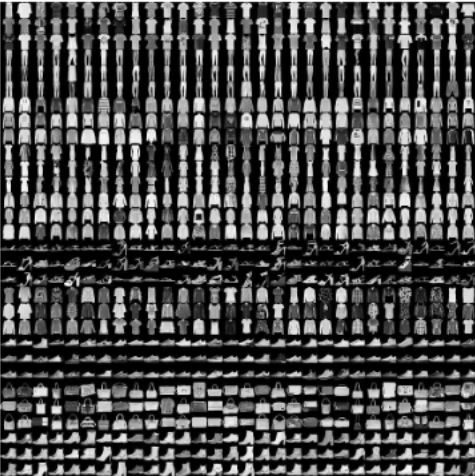

Estas son 60000 imágenes que se utilizarán para entrenar una red neuronal, y 10000 se usan para valorar con qué exactitud aprende la red.

Vamos a comprobar lo dicho anteriormente cargando una imagen.

In [172]:
print(train_images.shape)
# Vemos la matriz de la imagen número 1 (28x28)
print(train_images[5])
print(train_labels[5])

(60000, 28, 28)
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 20

Como podemos ver, el número 7 corresponde a una zapatilla. Lo hemos comprobado con python ordenando los números para asegurarnos de que funcionaba correctamente.

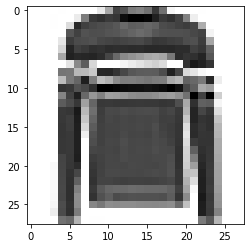

In [173]:
# Vamos a pintar con matplotlib la figura anterior.
import matplotlib.pyplot as plt
digit = train_images[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

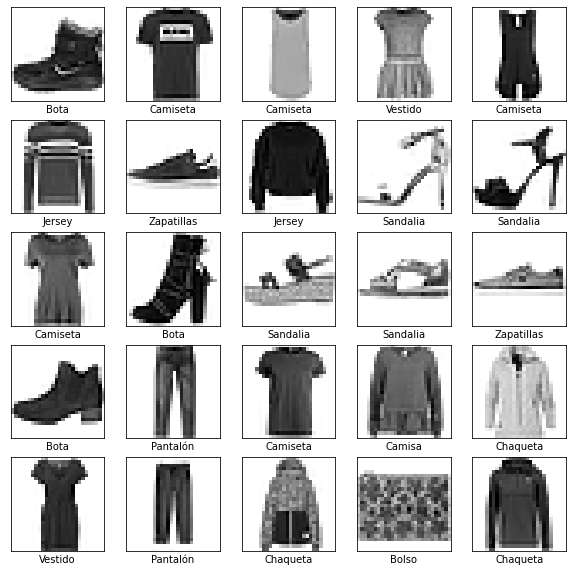

In [174]:
#Ahora comprobaremos que los datos están listos para construír y entrenar la red, para ello desplegamos del training
#set las 25 primeras imágenes con su etiqueta
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Ahora tenemos que diseñar las distintas arquitecturas de redes convolucionales para cada caso.

# CASO 1

In [175]:
#Importamos las librerías necesarias para las capas convolucionales
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

#1ª Capa
model1 = Sequential()
model1.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


En esta capa no se conectan todas las neuronas de entrada con todas las neuronas de la capa convolucional. Así, cada neurona se conecta con una pequeña región de 5 x 5 neuronas de la capa de entrada de 28 x 28. En la primera capa contamos con 32 filtros, que sirven para buscar características locales en pequeños grupos de entradas. Y una ventana 2 x 2 sobre la capa convolucional para crear un punto en la capa pooling. 

In [176]:
#2ª Capa
model1.add(Conv2D(64, (5, 5), activation = 'relu'))
model1.add(MaxPooling2D((2, 2)))
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


Esta capa, a diferencia de la anterior, cuenta con 64 filtros.

In [177]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten #"Aplanamos" los datos a un vector de 1 dimensión

model1.add(Flatten())
model1.add(Dense(10, activation = 'softmax'))
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_17 (Dense)            (None, 10)              

In [178]:
#Convertimos los tensores 2D a 3D
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [179]:
#Tenemos que entrenar el modelo
model1.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

model1.fit(train_images, train_labels,
          batch_size = 100,
          epochs = 5,
          verbose = 1)

test_loss, test_acc = model1.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 38s 64ms/step - loss: 0.9117 - accuracy: 0.7674
Epoch 2/5
600/600 [==============================] - 38s 64ms/step - loss: 0.2526 - accuracy: 0.9261
Epoch 3/5
600/600 [==============================] - 38s 64ms/step - loss: 0.1820 - accuracy: 0.9477
Epoch 4/5
600/600 [==============================] - 38s 63ms/step - loss: 0.1466 - accuracy: 0.9575
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.1031 - accuracy: 0.9704
Test accuracy: 0.9703999757766724


En los datos de entrenamiento hemos conseguido una precisión de 0.9707, es decir 97,07%.

*Exactitud*

In [184]:
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.1031 - accuracy: 0.9704 - 2s/epoch - 7ms/step


In [185]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9703999757766724


*Tras entrenar el modelo, comenzamos con las predicciones*

In [186]:
predictions = model1.predict(test_images)
predictions[5]

array([1.02374615e-05, 9.94754553e-01, 1.98505979e-04, 2.01022398e-04,
       1.35861314e-03, 1.04921664e-05, 7.77345776e-05, 2.72960705e-03,
       5.80121181e-04, 7.91267375e-05], dtype=float32)

In [187]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Las etiquetas de prediccion correctas estan en azul y las incorrectas en rojo.

Vamos a comprobar que funciona con un ejemplo

In [189]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255  

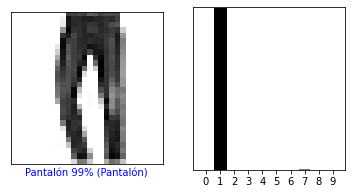

In [190]:
i = 5
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Podemos comprobar que la predicción ha acertado que es un pantalón con un 99% de fiabilidad.

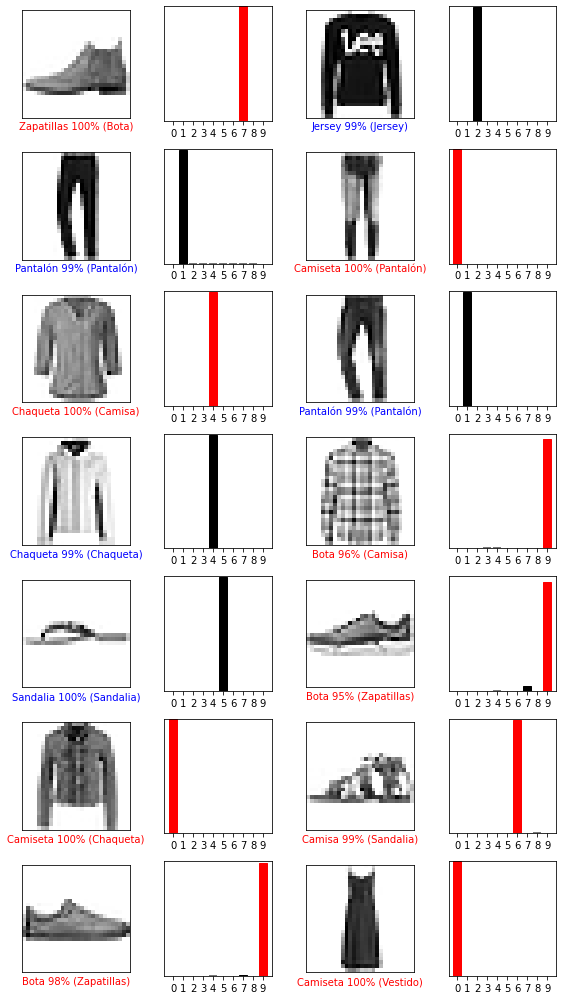

In [192]:
#Vamos a realizar la predicción de las primeras 14 imágenes
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Debajo de cada imagen nos aparece un porcentaje, que nos indica el nivel de acercamiento de la imagen con la etiqueta correspondiente. Además, el gráfico nos indica la probabilidad de que la barra indicada en cada imagen se corresponda con la correcta.
Lo que podemos ver tras esta predicción, es que ha realizado un mal ajuste, ya que la mayoría de las imágenes no se corresponden con la etiqueta y los gráficos tampoco muestran los resultados correctos.

# CASO 1 MODIFICADO

Ahora vamos a analizar el resultado del caso 1 si en lugar de ReLU usásemos tanh en la función de activación de las dos capas convolucionales. 

In [193]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

modelm = Sequential()
modelm.add(Conv2D(32, (5, 5), activation = 'tanh', input_shape = (28, 28, 1)))
modelm.add(MaxPooling2D((2, 2))) 
modelm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [194]:
modelm.add(Conv2D(64, (5, 5), activation = 'tanh'))
modelm.add(MaxPooling2D((2, 2))) 
modelm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [195]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

modelm.add(Flatten())
modelm.add(Dense(10, activation = 'softmax'))
modelm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1024)              0         
                                                                 
 dense_18 (Dense)            (None, 10)              

In [196]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [198]:
modelm.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

modelm.fit(train_images, train_labels,
          batch_size = 100,
          epochs = 5,
          verbose = 1)

test_loss, test_acc = modelm.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 41s 67ms/step - loss: 0.1675 - accuracy: 0.9538
Epoch 2/5
600/600 [==============================] - 40s 67ms/step - loss: 0.1497 - accuracy: 0.9584
Epoch 3/5
600/600 [==============================] - 40s 67ms/step - loss: 0.1359 - accuracy: 0.9622
Epoch 4/5
600/600 [==============================] - 40s 67ms/step - loss: 0.1248 - accuracy: 0.9651
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.1000 - accuracy: 0.9718
Test accuracy: 0.9718000292778015


Hemos obtenido una precisión de 0.9573, es decir, una precisión del 95.73%. Tras intercambiar la función de activación relu por tanh, la precisión se vuelve más baja, por lo que el anterior modelo es mejor.

*Predicciones*

In [199]:
predictions = modelm.predict(test_images)
predictions[6]

array([1.0626908e-06, 2.4872934e-05, 5.3041640e-06, 1.2900530e-04,
       9.8125225e-01, 6.4280140e-04, 3.3328575e-05, 2.4760822e-03,
       6.8643964e-03, 8.5709020e-03], dtype=float32)

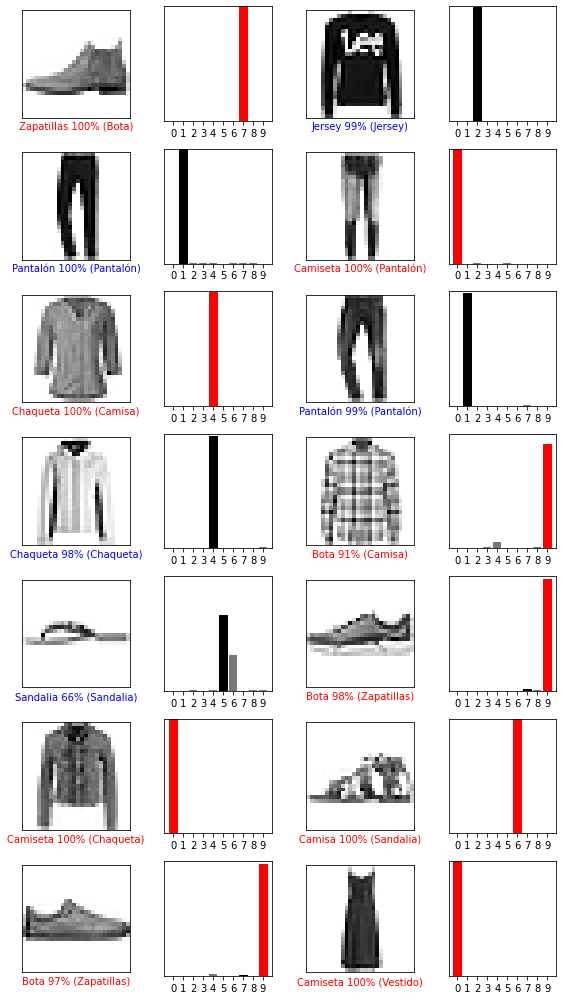

In [200]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255  


num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Como podemos ver, los resultados son muy parecidos al caso 1.

# CASO 1 CON 25 ÉPOCAS

In [201]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model25e = Sequential()
model25e.add(Conv2D(32, (5, 5), activation = 'tanh', input_shape = (28, 28, 1)))
model25e.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [202]:
model25e.add(Conv2D(64, (5, 5), activation = 'tanh')) 
model25e.add(MaxPooling2D((2, 2))) 
model25e.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
Total params: 52,096
Trainable params: 52,096
Non-trainable params: 0
_________________________________________________________________


In [203]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model25e.add(Flatten())
model25e.add(Dense(10, activation = 'softmax'))
model25e.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 10)              

In [204]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [205]:
model25e.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

model25e.fit(train_images, train_labels,
          batch_size = 100,
          epochs = 25,
          verbose = 1)

test_loss, test_acc = modelo25e.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/25
600/600 [==============================] - 41s 67ms/step - loss: 0.9836 - accuracy: 0.7695
Epoch 2/25
600/600 [==============================] - 41s 68ms/step - loss: 0.3277 - accuracy: 0.9098
Epoch 3/25
600/600 [==============================] - 41s 68ms/step - loss: 0.2501 - accuracy: 0.9302
Epoch 4/25
600/600 [==============================] - 41s 68ms/step - loss: 0.2071 - accuracy: 0.9419
Epoch 5/25
600/600 [==============================] - 41s 68ms/step - loss: 0.1782 - accuracy: 0.9505
Epoch 6/25
600/600 [==============================] - 40s 67ms/step - loss: 0.1572 - accuracy: 0.9562
Epoch 7/25
600/600 [==============================] - 40s 66ms/step - loss: 0.1414 - accuracy: 0.9604
Epoch 8/25
600/600 [==============================] - 40s 66ms/step - loss: 0.1291 - accuracy: 0.9638
Epoch 9/25
600/600 [==============================] - 40s 66ms/step - loss: 0.1191 - accuracy: 0.9668
Epoch 10/25
600/600 [==============================] - 40s 66ms/step - loss: 0.110

Como podíamos deducir, al contar con más épocas el modelo es mejor, es decir, la precisión aumenta a un 98.48%.

*Predicciones*

In [206]:
predictions = modelm.predict(test_images)
predictions[5]

array([1.3129476e-04, 9.8961419e-01, 6.3901267e-04, 4.3106545e-04,
       2.5435786e-03, 1.4815974e-05, 1.8295784e-04, 4.3255375e-03,
       1.8322613e-03, 2.8518625e-04], dtype=float32)

In [207]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255  

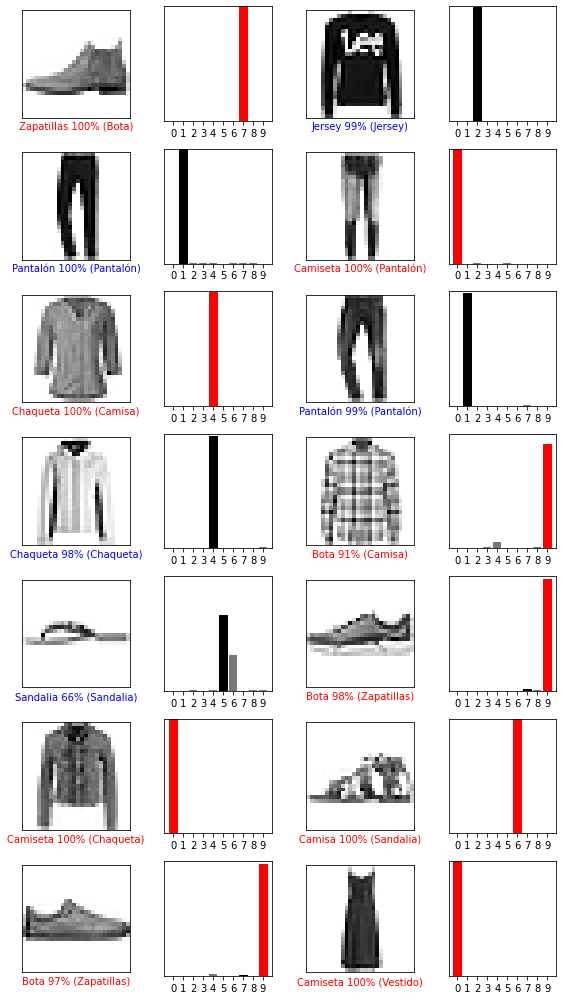

In [208]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# CASO 2

Para este caso debemos modificar algunos de los datos utilizados anteriormente.

In [209]:
#1ª Capa
model2 = Sequential()
model2.add(Conv2D(64, (7, 7), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [210]:
#2ª Capa
model2.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model2.add(MaxPooling2D((2, 2)))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [211]:
model2.add(Flatten())
model2.add(Dense(65, activation = 'relu'))
model2.add(Dense(10, activation = 'softmax'))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 6272)              0         
                                                                 
 dense_20 (Dense)            (None, 65)              

In [212]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [213]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])

model2.fit(train_images, train_labels,
          batch_size = 100,
          epochs = 5,
          verbose = 1)

test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 136s 227ms/step - loss: 0.9357 - accuracy: 0.7439
Epoch 2/5
600/600 [==============================] - 136s 227ms/step - loss: 0.2510 - accuracy: 0.9251
Epoch 3/5
600/600 [==============================] - 135s 226ms/step - loss: 0.1753 - accuracy: 0.9487
Epoch 4/5
600/600 [==============================] - 136s 226ms/step - loss: 0.1348 - accuracy: 0.9604
Epoch 5/5
313/313 [==============================] - 8s 24ms/step - loss: 0.0941 - accuracy: 0.9728
Test accuracy: 0.9728000164031982


Como podemos comprobar, hay una precisión del 97.28%


*Exactitud*

In [214]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

313/313 - 7s - loss: 0.0941 - accuracy: 0.9728 - 7s/epoch - 22ms/step


La precisión y la función de pérdidas son las mismas que las del modelo de entrenamiento, es decir, no se produce un sobreentrenamiento.

In [215]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9728000164031982


Hay una precisión del 97.28%

*Predicción*

In [216]:
predictions = model2.predict(test_images)
predictions[5]

array([8.8917504e-06, 9.9923801e-01, 1.9846622e-05, 2.1578075e-05,
       4.1079882e-05, 5.4680197e-07, 1.0894774e-05, 5.4775813e-04,
       5.9206730e-05, 5.2071024e-05], dtype=float32)

In [217]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255 

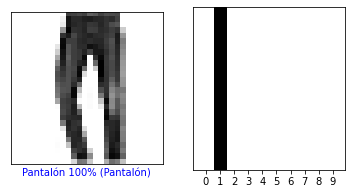

In [218]:
i = 5
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Como podemos comprobar, la precisión ahora es mucho mayor, ya que el nombre que sale es el correspondiente a la etiqueta de la imagen.

Ahora analizaremos el comportamiento de las primeras 14 imágenes.

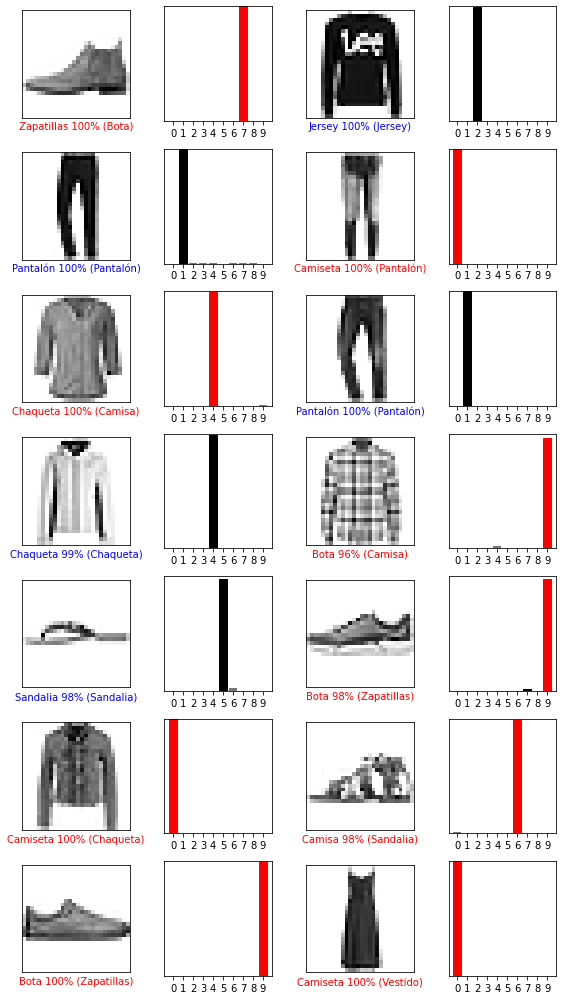

In [219]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# CASO 3

In [220]:
#1ª Capa
model3 = Sequential()
model3.add(Conv2D(64, (7, 7), activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


In [221]:
#2ª Capa
model3.add(Conv2D(128, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D((2, 2)))
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
Total params: 77,056
Trainable params: 77,056
Non-trainable params: 0
_________________________________________________________________


In [222]:
model3.add(Flatten())
model3.add(Dense(65, activation = 'relu'))
model3.add(Dense(10, activation = 'softmax'))
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 65)              

In [223]:
from keras.utils.np_utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000, 10)


In [224]:
model3.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model3.fit(train_images, train_labels,
          batch_size = 100,
          epochs = 5,
          verbose = 1)

test_loss, test_acc = model3.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 113s 188ms/step - loss: 0.1685 - accuracy: 0.9493
Epoch 2/5
600/600 [==============================] - 112s 187ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 3/5
600/600 [==============================] - 112s 186ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 4/5
600/600 [==============================] - 111s 184ms/step - loss: 0.0255 - accuracy: 0.9919
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 0.0294 - accuracy: 0.9897
Test accuracy: 0.9897000193595886


Tras estos cambios, podemos comprobar que la precisión y los valores de pérdida son mucho mejores que en el resto de casos, es decir, la precisión es del 99.18%


*Exactitud*

In [225]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

313/313 - 6s - loss: 0.0294 - accuracy: 0.9897 - 6s/epoch - 18ms/step


In [226]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9897000193595886


*Predicciones*

Vamos a realizar la predicción de la 6ª imagen

In [227]:
predictions = model3.predict(test_images)
predictions[5]

array([1.4897408e-07, 9.9992788e-01, 1.0071923e-07, 1.2871126e-08,
       5.1638643e-05, 2.1077737e-08, 4.4424110e-07, 1.7988052e-05,
       1.6188320e-06, 1.5975698e-07], dtype=float32)

In [228]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255  

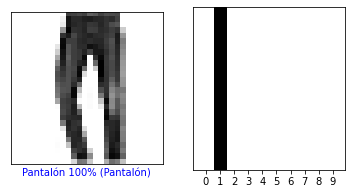

In [229]:
i = 5
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Aquí podemos ver que hay una predicción del 100%

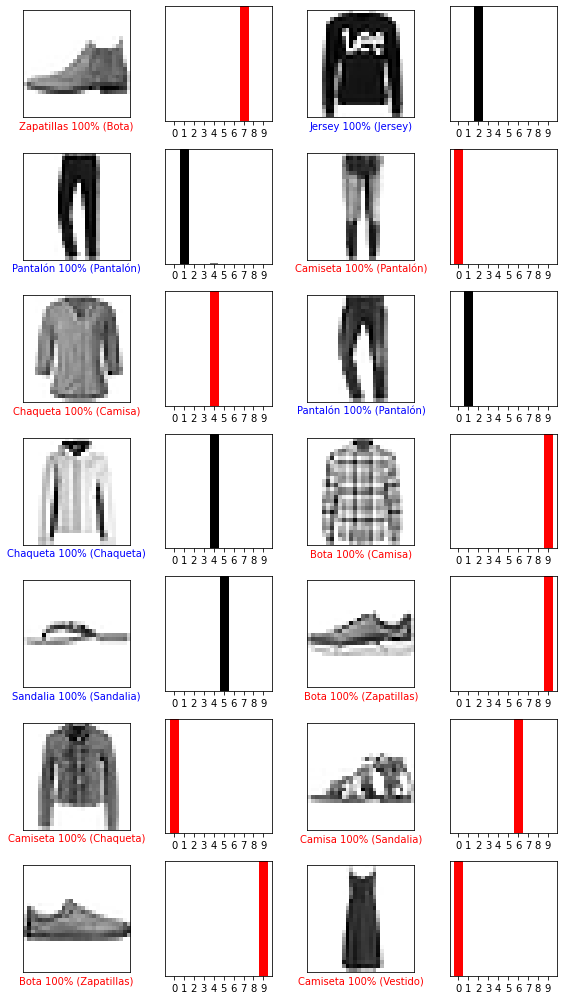

In [230]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Como podemos comprobar, sigue dando error a la hora de etiquetar las imágenes, ya que lo hace de forma errónea. Esto se puede deber al parecido que presentan algunas de las imágenes y por ello el programa no las diferencia.

# VER CONCEPTOS

***Bach-Normalization:*** Básicamente consiste en añadir un paso extra entre las neuronas y la función de activación para normalizar las activaciones de salida.
Se trata de una técnica de ayuda al entrenamiento. A continuación, se añaden 2 parámetros, esto se hace para que el rango de entrada escale más fácil hasta el rango de salida.

***Dropout:*** Es una técnica muy utilizada cuando tenemos capas con muchas neuronas. Consiste en ignorar una cierta cantidad de neuronas elegidas de manera aleatoria durante el proceso de entrenamiento. Esto se hace para obligar a las demás neuronas de su alrededor a no depender de las demás. 
Tiene un parámetro que indica la probabilidad de que esta se quede activada, cuánto más cerca esté de 0, se desactivarán menos neuronas y cuánto más cerca esté del 1 más neuronas serán desactivadas.

Este es un método que puede ayudar a mejorar el modelo, ya que nos puede ayudar a comprobar cómo de bueno está siendo el entrenamiento del modelo. De esta forma, durante el entrenamiento, podemos asegurarnos de si se desactivan más o menos neuronas.

***Callback:*** Es un método muy utilizado para que las funciones se puedan comunicar entre sí, es decir, una función se introduce dentro de otra en forma de parámetro. Esta función solo se invoca si ha tenido lugar una acción definida previamente. El ejemplo más sencillo podría ser el de el click de un ratón: el click del ratón hace que se ejecute el callback, y la función en sí nos redirigiría a otra página.

# CONCLUSIÓN

Como hemos podido observar a lo largo de la práctica, la relación que se establece entre el modelo de entrenamiento y el de prueba ayudará a predecir el desarrollo de dicho modelo. No obstante, hemos comprobado que dependen de otros factores que van a ayudar a obtener un mejor resultado del modelo.
En este caso, el modelo que mejores resultados ha dado ha sido el 3, ya que como hemos visto, la predicción es del 100% y los resultados cuadran con la etiqueta correspondiente, o al menos se acercan con el resultado correcto.


# BIBLIOGRAFÍA

BatchNormalization layer

https://keras.io/api/layers/normalization_layers/batch_normalization/

Dropout layer

https://keras.io/api/layers/regularization_layers/dropout/

Callbacks API

https://keras.io/api/callbacks/

Documento Github Redes Neuronales convolucionales